In [3]:
import numpy as np
import pickle
data = []
for file in [
    "/home/od/Desktop/repos/dfd-clip/misc/compression.pickle",
    "/home/od/Desktop/repos/dfd-clip/misc/dev-mode+force-rgb.pickle",
    "/home/od/Desktop/repos/dfd-clip/misc/dev-mode+force-hue.pickle",
    "/home/od/Desktop/repos/dfd-clip/misc/dev-mode+force-bright.pickle",
    "/home/od/Desktop/repos/dfd-clip/misc/any.pickle",
]:
    with open(file, "rb") as f:
        data.append(pickle.load(f))

for i in range(len(data)):
    for l in range(12):
        for s in ["k", "v"]:
            mx = np.max(data[i][s][l])
            mn = np.min(data[i][s][l])
            data[i][s][l] = (data[i][s][l] - mn) / (mx - mn)
data[-1] = {
    "k": [1 - data[-1]["k"][l] for l in range(12)],
    "v": [1 - data[-1]["v"][l] for l in range(12)]
}

In [10]:

l = {
    "k": [(2 - sum([w * data[i]["k"][l] for i, w in enumerate([0.25, 0.25, 0.25, 0.25, 1])])) / 2 for l in range(12)],
    "v": [(2 - sum([w * data[i]["v"][l] for i, w in enumerate([0.25, 0.25, 0.25, 0.25, 1])])) / 2 for l in range(12)]
}

# scale sum to 1
for _l in range(12):
    for s in ["k", "v"]:
        l[s][_l] = l[s][_l] / np.sum(l[s][_l])

# l = {
#     "k": [sum([w * data[i]["k"][l] for i, w in enumerate([0, 0, 0, 0, 1])]) for l in range(12)],
#     "v": [sum([w * data[i]["v"][l] for i, w in enumerate([0, 0, 0, 0, 1])]) for l in range(12)]
# }

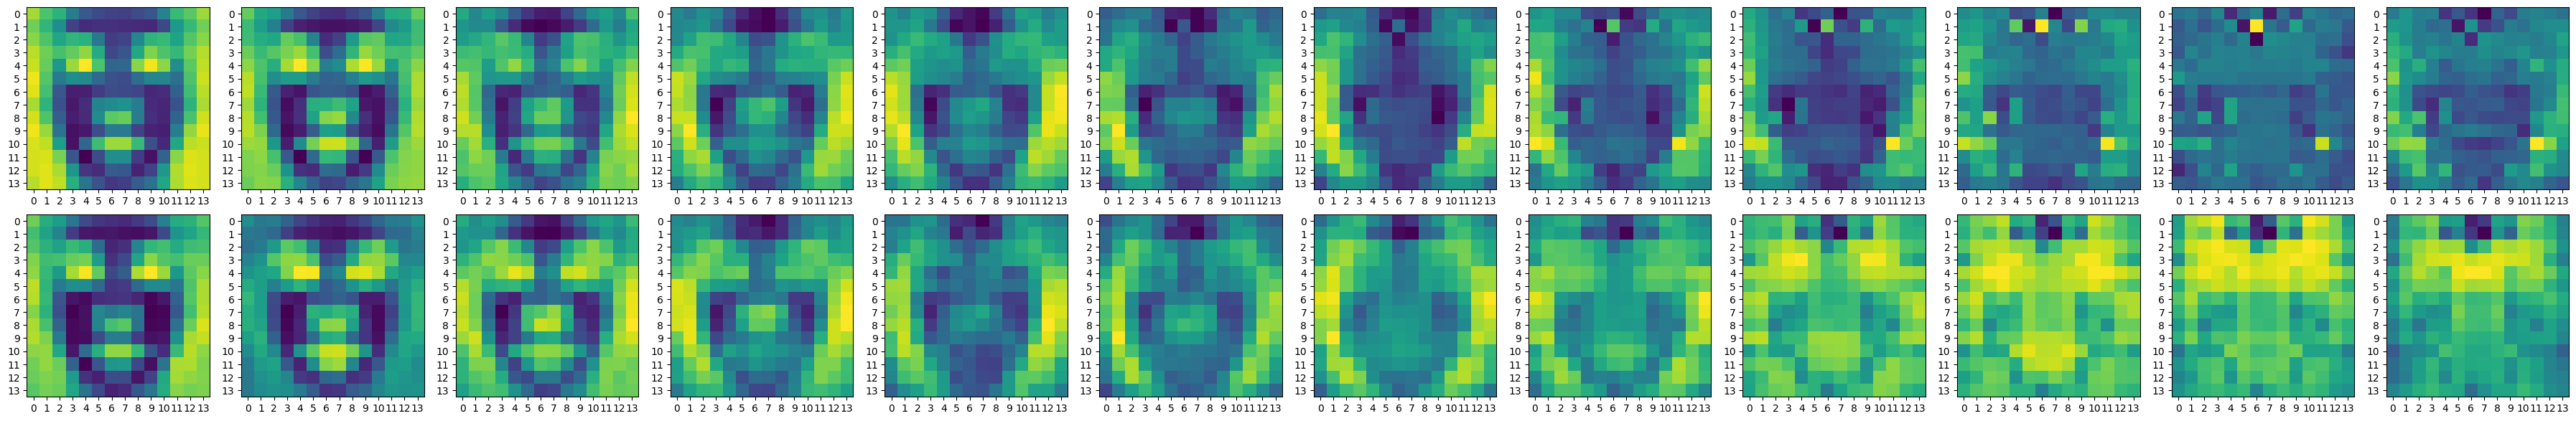

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(36, 6))
for j, s in enumerate(["k", "v"]):
    for i, v in enumerate(l[s]):
        plt.subplot(2, 12, j * 12 + i + 1)
        im = plt.imshow(v)

        plt.gca().set_xticks(np.arange(14))
        plt.gca().set_yticks(np.arange(14))

plt.tight_layout()
plt.show()

In [12]:
for _l in range(12):
    for s in ["k", "v"]:
        print(np.sum(l[s][_l]))
with open("./misc/guide_map.pickle", "wb") as f:
    pickle.dump(l, f)

1.0
1.0
1.0
1.0
0.9999999
1.0
1.0
1.0
0.9999999
1.0
1.0
0.99999994
0.99999994
1.0
1.0
1.0
1.0
0.99999994
1.0
0.99999994
1.0
1.0000001
1.0
0.9999999
